<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/DataScience/TensorFlow/AutoEncoder/Stacked_Deep_AutoEncoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
Exercicio extraido do curso "TensorFlow: Machine Learning e Deep Learning com Python", oferecido pelo Prof. Jones Granatyr.
Link do curso: https://www.udemy.com/tensorflow-machine-learning-deep-learning-python/

Adicionado comentários para melhor entendimento.

In [1]:
# carrega a base mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = True)

X = mnist.train.images

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

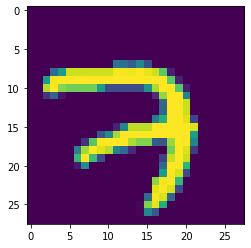

In [2]:
# Exibe uma imagem
import matplotlib.pyplot as plt
%matplotlib inline
# é realizado um reshape, pois a base quando importada tem outro formato, somente com uma coluna, com 784 posições
plt.imshow(X[0].reshape(28,28))

In [0]:
# o autoencoder terá tres camadas, uma de entrada, uma intermediaria, e a camada de encoder. Depois ela passa a ser decodificada, ficando com os seguintes numeros
# 784 -> 128 -> 64 (camada codificada) -> 128 -> 784

# etapa encoder
neuronios_entrada = 784
neuronios_oculta1 = 128

# dados / imagem codificados
neuronios_oculta2 = 64

# etapa decoder
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = neuronios_entrada

In [0]:
import tensorflow as tf

In [0]:
# como o tensorflow monta grafos para ser executados nas session, é interessante
# sempre limpar os grafos em memoria, principalmente porque poderá ser feito varios testes
tf.reset_default_graph()

In [0]:
# cria o placeholder para alimentar a função com as imagens
# define o formato dos dados
# None na quantidade de dados do batch (sera definido mais para frente)
# formato da entrada, no caso os neuronios_entrada
xph = tf.placeholder(tf.float32, [None, neuronios_entrada])

In [0]:
# utilizada a inicialização Xavier
# Essa inicialização dos pesos mantem uma escala para o pesos entre as camadas, evitando uma inicializacao com valores aleatorios muito discrepantes entre as camadas
# essa pratica ajuda a melhorar a precisão do algoritmo, e se adapta melhor usando a função sigmoid

# no tensorflow é usado uma variação da Xavier chamada He, que se adapta melhor na função relu
inicializador = tf.variance_scaling_initializer()

In [0]:
# definindo os pesos, aqui será feito de forma manual, evitando usar os recursos ja prontos
# seguindo essa estrutura
# 784 -> 128 -> 64 (inf codificada) -> 128 -> 784 (saida teoricamente identica a entrada)
W = {'encoder_oculta1': tf.Variable(inicializador([neuronios_entrada, neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta1, neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta2, neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_oculta3, neuronios_saida]))}

In [0]:
# definindo o BIAS, podemos usar o mesmo nome
# eles serão definido como um vetor, e nao como matriz
# nao tem BIAS ligado na camanda de entrada
b = {'encoder_oculta1': tf.Variable(inicializador([neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_saida]))}

In [0]:
# criação das camadas efetivamente
# cada camada vai ter sua respectiva entrada, e deverá ser multiplicada pelo peso e adicionado o BIAS
# ja faz também a chamada para a função de ativação
camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(xph, W['encoder_oculta1']), b['encoder_oculta1']))

# agora cria a camada com a mesma formula, pas usando o resultado da primeira camada oculta
# camada codificada
camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, W['encoder_oculta2']), b['encoder_oculta2']))

# comeca a decodificar a os dados novamente
camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, W['decoder_oculta3']), b['decoder_oculta3']))

# saida (teoricamente deve ser os memso dados da entrada)
camada_saida = tf.nn.relu(tf.add(tf.matmul(camada_oculta3, W['decoder_saida']), b['decoder_saida']))


In [11]:
# cria o erro, passando as entradas, e saidas, aonde neste caso a entrada é a resposta correta, "decodificada"
erro = tf.losses.mean_squared_error(xph, camada_saida)

# cria o otimizador
otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)

# faz o treinamento
treinamento = otimizador.minimize(erro)

# define a quantidade de registros a ser treinada por vez
batch_size = 128

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# faz o treinamento efetivamente
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoca in range(50):
    # pega a quantidade de batches que tem, ou seja, divide o total pelo batch
    numero_batches = mnist.train.num_examples // batch_size
    # navega pela "lista" de batches
    for i in range(numero_batches):
      # pega os proximos registros compreendidos no batch (neste caso 128)
      # esse metodo next_batch retorna o X e Y, como nao iremos usar o y, então ignoramos ele com o _
      X_batch, _ = mnist.train.next_batch(batch_size)
      custo, _ = sess.run([erro, treinamento], feed_dict = {xph: X_batch})
    print('Epoca: ' + str(epoca + 1) + ' erro: ' + str(custo))
  
  # depois de treinar o autoencoder, salva a camada oculta 2, que é o encode
  imagens_codificadas = sess.run(camada_oculta2, feed_dict = {xph: X})
  
  #pega as imagens decodificadas(teoricamento seriam identicos as originais)
  imagens_decodificadas = sess.run(camada_saida, feed_dict = {xph: X} )

Epoca: 1 erro: 0.019278891
Epoca: 2 erro: 0.01651195
Epoca: 3 erro: 0.015790198
Epoca: 4 erro: 0.015568753
Epoca: 5 erro: 0.014116281
Epoca: 6 erro: 0.01384999
Epoca: 7 erro: 0.014215494
Epoca: 8 erro: 0.012867102
Epoca: 9 erro: 0.013975524
Epoca: 10 erro: 0.0129812
Epoca: 11 erro: 0.0139015075
Epoca: 12 erro: 0.013444464
Epoca: 13 erro: 0.013890937
Epoca: 14 erro: 0.014028588
Epoca: 15 erro: 0.012998829
Epoca: 16 erro: 0.013470579
Epoca: 17 erro: 0.012672226
Epoca: 18 erro: 0.013856785
Epoca: 19 erro: 0.013159397
Epoca: 20 erro: 0.012053286
Epoca: 21 erro: 0.012369667
Epoca: 22 erro: 0.012066853
Epoca: 23 erro: 0.013654327
Epoca: 24 erro: 0.011999694
Epoca: 25 erro: 0.012849856
Epoca: 26 erro: 0.01284242
Epoca: 27 erro: 0.0122578945
Epoca: 28 erro: 0.012301227
Epoca: 29 erro: 0.011932015
Epoca: 30 erro: 0.011708658
Epoca: 31 erro: 0.013216487
Epoca: 32 erro: 0.012956418
Epoca: 33 erro: 0.012923368
Epoca: 34 erro: 0.011765537
Epoca: 35 erro: 0.012538294
Epoca: 36 erro: 0.011999218
Epoc

In [13]:
# imagens com 64 de tamanho
imagens_codificadas.shape

(55000, 64)

In [14]:
imagens_codificadas[0]

array([0.        , 1.3918757 , 2.729403  , 1.3610253 , 0.        ,
       0.8424265 , 0.        , 0.        , 0.8021135 , 0.        ,
       0.        , 2.3711555 , 1.0216444 , 1.0022246 , 0.7264715 ,
       2.010078  , 0.        , 0.95874816, 2.3440094 , 1.6034832 ,
       1.7311517 , 3.126268  , 1.9183966 , 0.        , 1.6212763 ,
       1.8889877 , 0.6033779 , 2.0597806 , 0.6489494 , 2.5705876 ,
       0.        , 1.4218402 , 2.6653142 , 0.        , 0.        ,
       0.4504723 , 0.        , 0.        , 0.        , 0.        ,
       1.9918942 , 2.085389  , 1.4367081 , 1.0261955 , 0.        ,
       2.0136425 , 1.1345999 , 2.6838064 , 2.761467  , 1.8816426 ,
       1.2508643 , 0.        , 0.45294392, 0.        , 2.2221866 ,
       0.        , 1.6550058 , 0.        , 0.        , 1.5618117 ,
       2.2636216 , 0.        , 0.916713  , 2.3124776 ], dtype=float32)

In [15]:
# imagens decodificadas com 784
imagens_codificadas.shape

(55000, 64)

In [16]:
imagens_codificadas[0]

array([0.        , 1.3918757 , 2.729403  , 1.3610253 , 0.        ,
       0.8424265 , 0.        , 0.        , 0.8021135 , 0.        ,
       0.        , 2.3711555 , 1.0216444 , 1.0022246 , 0.7264715 ,
       2.010078  , 0.        , 0.95874816, 2.3440094 , 1.6034832 ,
       1.7311517 , 3.126268  , 1.9183966 , 0.        , 1.6212763 ,
       1.8889877 , 0.6033779 , 2.0597806 , 0.6489494 , 2.5705876 ,
       0.        , 1.4218402 , 2.6653142 , 0.        , 0.        ,
       0.4504723 , 0.        , 0.        , 0.        , 0.        ,
       1.9918942 , 2.085389  , 1.4367081 , 1.0261955 , 0.        ,
       2.0136425 , 1.1345999 , 2.6838064 , 2.761467  , 1.8816426 ,
       1.2508643 , 0.        , 0.45294392, 0.        , 2.2221866 ,
       0.        , 1.6550058 , 0.        , 0.        , 1.5618117 ,
       2.2636216 , 0.        , 0.916713  , 2.3124776 ], dtype=float32)

In [17]:
# comparação entre a imgaem original, codificada e decodificada
import numpy as np

numero_imagens = 5
# pega imagens aleatorias
imagens_teste = np.random.randint(X.shape[0], size = numero_imagens)
imagens_teste

array([38170, 15649,  8608, 13715, 12251])

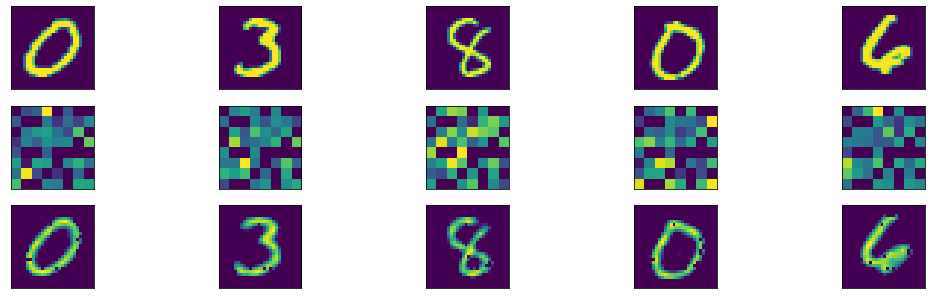

In [18]:
# cria uma figura para exibição
# figsize é so o tamanho da exibição, nao interfere no tamanho original da imagem
# vai ser utilizado o recurso de subplot, ou seja, um subgrafico, para colocar as imagens alinhadas lado a lado na mesma figura
plt.figure(figsize = (18,18))
for i, indice_imagem in enumerate(imagens_teste):
  #print(i)
  #print(indice_imagem)
  # define a quantidade de linhas de graficos, colunas, e sua posicao atual
  eixo = plt.subplot(10, 5, i +1)
  #imagens originais
  plt.imshow(X[indice_imagem].reshape(28, 28))
  # remove os "numeros" ao redor da imagem
  plt.xticks(())
  plt.yticks(())

  #imagens codificadas
  # define a quantidade de linhas de graficos, colunas, e sua posicao atual (neste caso e somado, para ficar em posicao diferente da original)
  eixo = plt.subplot(10, 5, i + 1 + numero_imagens)
  #imagens alteradas
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 8))
  # remove os "numeros" ao redor da imagem
  plt.xticks(())
  plt.yticks(())

  #imagens decodificadas
  # define a quantidade de linhas de graficos, colunas, e sua posicao atual (neste caso e multiplicado, para ficar em posicao diferente da original e codificada)
  eixo = plt.subplot(10, 5, i + 1 + numero_imagens * 2)
  #imagens decodificadas
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  # remove os "numeros" ao redor da imagem
  plt.xticks(())
  plt.yticks(())